In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./benchmark.csv', sep='\t')
df

,cpu,timing,hourly_cost,total_cost,hourly_spot_cost,total_spot_cost
c5.4xlarge,8,5441,0.6800,1.027744,0.29,0.438302778
c5.9xlarge,18,4050,1.5300,1.721250,0.58,0.6525
c4.4xlarge,8,6743,0.7960,1.490952,0.25,0.468263889
m5.4xlarge,8,6398,0.7680,1.364907,0.27,0.47985
Pleiades Haswell,24,6813,0.5344,1.011352,--,--
Pleiades Ivybridge,16,9373,0.2912,0.758172,--,--


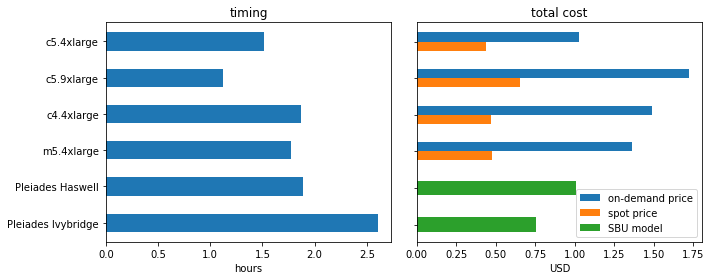

In [3]:
fig, axes = plt.subplots(1, 2, figsize=[10, 4])

ind = np.arange(6, 0, -1)  # up-down
# ind = np.arange(6)  # bottom-up

axes[0].barh(ind, df['timing']/3600, tick_label=df.index, height=0.5)
axes[0].set_title('timing')
axes[0].set_xlabel('hours')

axes[1].barh(ind[:4]+0.125, df['total_cost'][:4], height=0.25, label='on-demand price')
axes[1].barh(ind[:4]-0.125, df['total_spot_cost'][:4].astype('float'), height=0.25, label='spot price')
axes[1].barh(ind[4:], df['total_cost'][4:], height=0.4, label='SBU model')

axes[1].set_title('total cost')
axes[1].set_xlabel('USD')
axes[1].legend()

axes[1].set_yticks(ind)
axes[1].set_yticklabels([' '])

fig.tight_layout()
fig.savefig('benchmark.png', dpi=300)

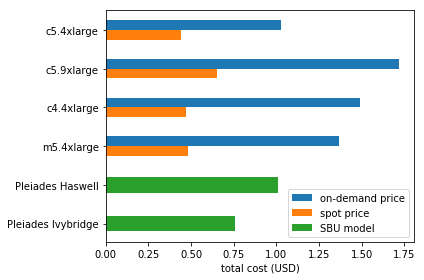

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ind = np.arange(6, 0, -1)

ax.barh(ind[:4]+0.125, df['total_cost'][:4], height=0.25, label='on-demand price')
ax.barh(ind[:4]-0.125, df['total_spot_cost'][:4].astype('float'), height=0.25, label='spot price')
ax.barh(ind[4:], df['total_cost'][4:], height=0.4, label='SBU model')

ax.set_xlabel('total cost (USD)')
ax.legend()

ax.set_yticks(ind)
ax.set_yticklabels(df.index)

fig.tight_layout()
#fig.savefig('benchmark.png', dpi=300)